<a href="https://colab.research.google.com/github/Salah-Mo-hammed/Prediction_of_Product_Sales/blob/main/project1Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df_sales=pd.read_csv("/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv")

In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data cleaning

In [5]:
# check for duplicated values
df_sales.duplicated().sum() # np.int64(0) then there is no duplicates
df_sales[df_sales.duplicated()] # to be sure show me the duplicates (no duplicates)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [6]:
# check for NaN values
null_count=df_sales.isna().sum() # item_weght 1463 ,Outlet_Size 2410
null_percent=null_count/len(df_sales)*100
null_percent # show the percent of null values for each col

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [7]:
# display all cat_cols and num_cols
cat_cols=df_sales.select_dtypes("object").columns
num_cols=df_sales.select_dtypes("number").columns
print(f"nums cols are{num_cols} ")
print('\n')
print(f"cat cols are{cat_cols} ")


nums cols areIndex(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object') 


cat cols areIndex(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object') 


In [8]:
df_sales[cat_cols].isna().sum() # Outlet_Size has 2410 nan value , we will replace it with Missing value (categorical)
df_sales['Outlet_Size']=df_sales['Outlet_Size'].fillna("Missing value here")
df_sales[cat_cols].isna().sum() # done replacing it

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [9]:
# now the same for numaric cols
df_sales[num_cols].isna().sum() # i know i made it above but just to be all in front of me (Item_Weight has 1463)
# we can fill it with -1 or what value we want , as mean , medain , any central tendency
df_sales['Item_Weight']=df_sales['Item_Weight'].fillna(-1) # i can take a look on the table and see the relasion ship between this and any column and fill the best value in it
df_sales[num_cols].isna().sum() # done

,0
Item_Weight,0
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [10]:
# take a look in inconsistent values , now cat cols
for col in cat_cols:
  print(f"let's see the  uniqe values in : {col} ")
  print(df_sales[col].value_counts())
  print("\n ***********************")
  # Item_Fat_Content{LF:Low Fat ,low fat :Low Fat ,reg :Regular}
  #

let's see the  uniqe values in : Item_Identifier 
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

 ***********************
let's see the  uniqe values in : Item_Fat_Content 
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

 ***********************
let's see the  uniqe values in : Item_Type 
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Na

In [11]:
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace({'LF':'Low Fat' ,'low fat' :'Low Fat' ,'reg':'Regular'})
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [12]:
df_sales.isna().sum() # done cleaning the data , still one thing , see type of columns

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [13]:
df_sales[cat_cols].value_counts()

Item_Identifier  Item_Fat_Content  Item_Type    Outlet_Identifier  Outlet_Size         Outlet_Location_Type  Outlet_Type      
NCZ54            Low Fat           Household    OUT049             Medium              Tier 1                Supermarket Type1    1
DRA12            Low Fat           Soft Drinks  OUT010             Missing value here  Tier 3                Grocery Store        1
                                                OUT013             High                Tier 3                Supermarket Type1    1
                                                OUT017             Missing value here  Tier 2                Supermarket Type1    1
                                                OUT018             Medium              Tier 3                Supermarket Type2    1
                                                                                                                                 ..
DRA59            Regular           Soft Drinks  OUT017             Missing value here  Tier 2                Supermarket Type1    1
                                                OUT013             High                Tier 3                Supermarket Type1    1
                                                OUT010             Missing value here  Tier 3                Grocery Store        1
DRA24            Regular           Soft Drinks  OUT049             Medium              Tier 1                Supermarket Type1    1
                                                OUT035             Small               Tier 2                Supermarket Type1    1
Name: count, Length: 8523, dtype: int64

In [14]:
len(df_sales) # how many rows

8523

In [15]:
df_sales.dtypes
# df_sales['Outlet_Size']

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [16]:
df_sales[num_cols].describe() # or make a loop if you want just mean ,median , and max

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# project 1-part 3 (core)

## histogram of num features

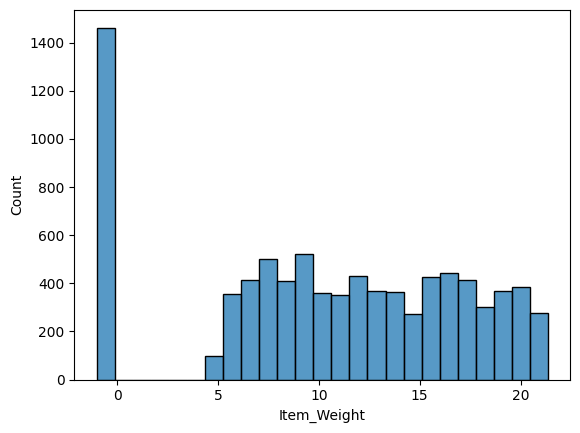

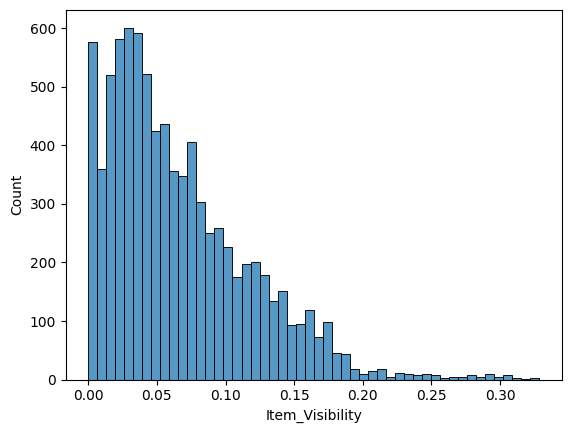

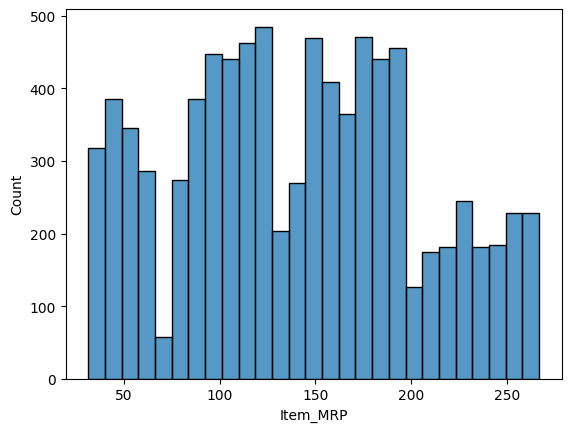

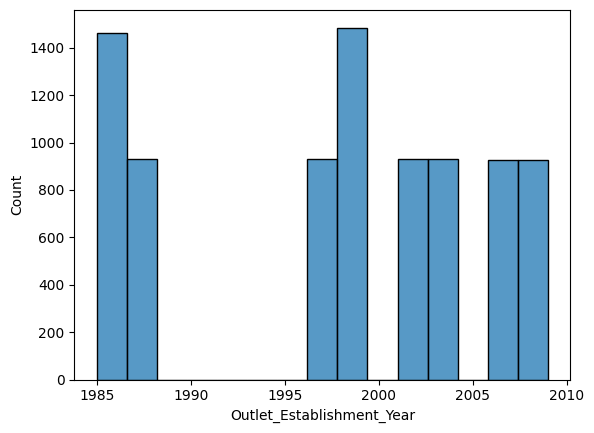

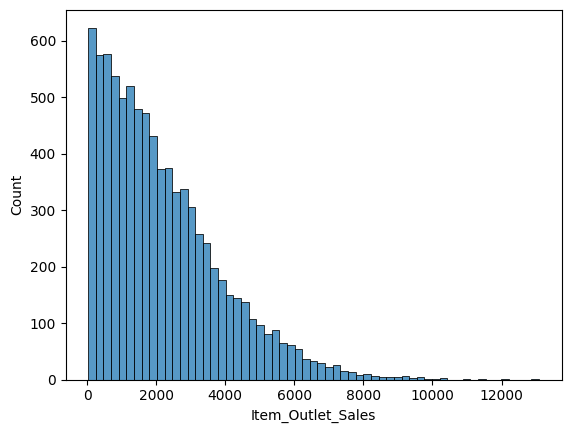

In [38]:
import seaborn as sns

for col in num_cols:
  ax=sns.histplot(data=df_sales,x=col)
  # other way
  # ax=df_sales[col].hist()
  # ax.set(title=f"{col}")
  plt.show()


## BoxPlots for num features

In [ ]:
for col in num_cols:
  # ax=sns.boxplot(data=df_sales,x=col)
  # other way
  ax=df_sales[col].plot(kind='box')
  ax.set(title=f"{col}")
  plt.show()

## countplots for cat cols

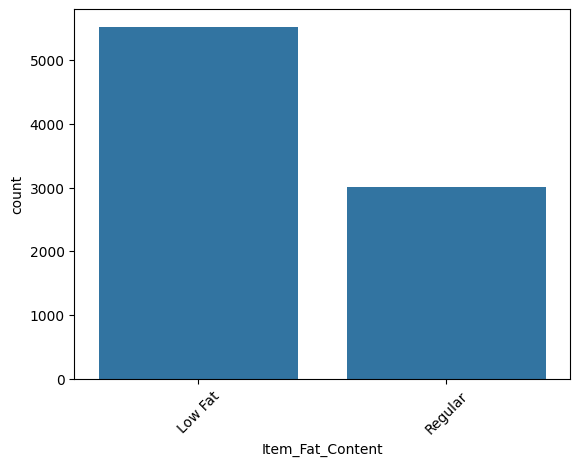

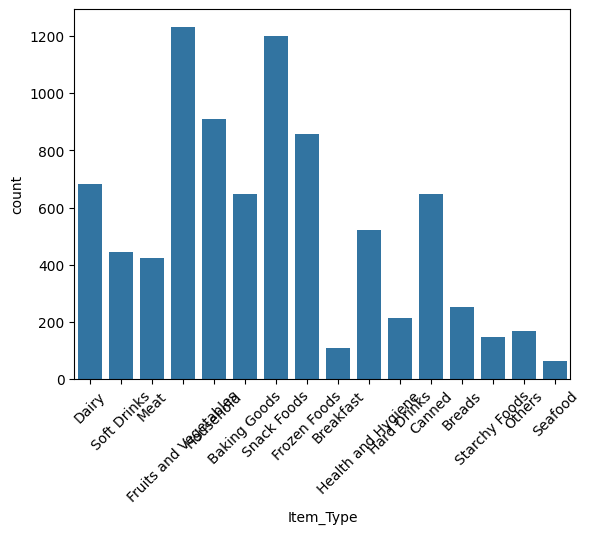

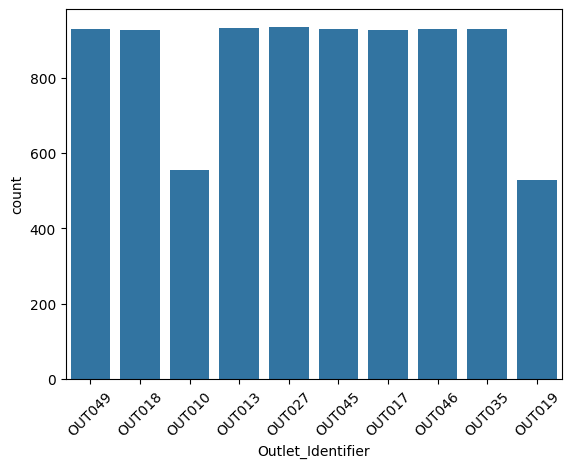

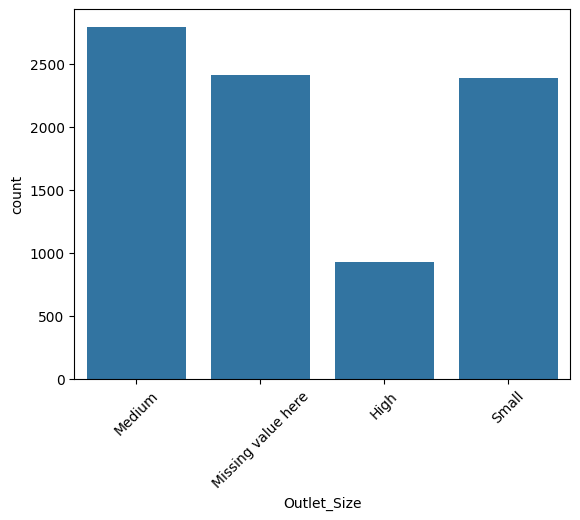

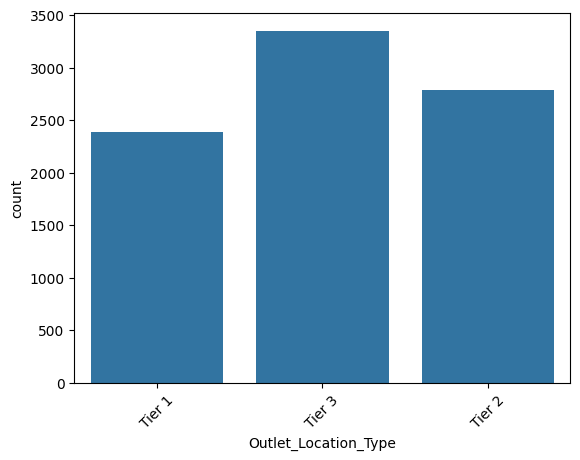

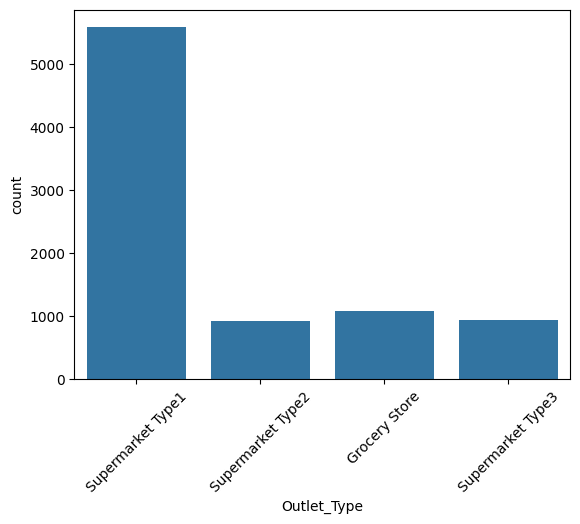

In [67]:
for col in cat_cols:
  if(col!='Item_Identifier'): # because Item_Identifier has 1559 row , and there is no need to see the distripution of it
    ax=sns.countplot(data=df_sales,x=col)
    plt.xticks(rotation=45)
    plt.show()

## heatmap for corr between num features

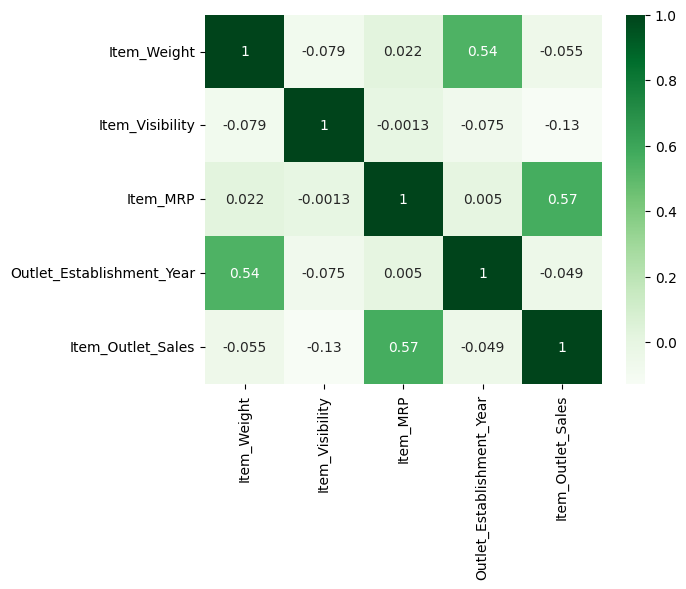

In [68]:
corr= df_sales.corr(numeric_only=True)
ax=sns.heatmap(corr,cmap='Greens',annot=True)